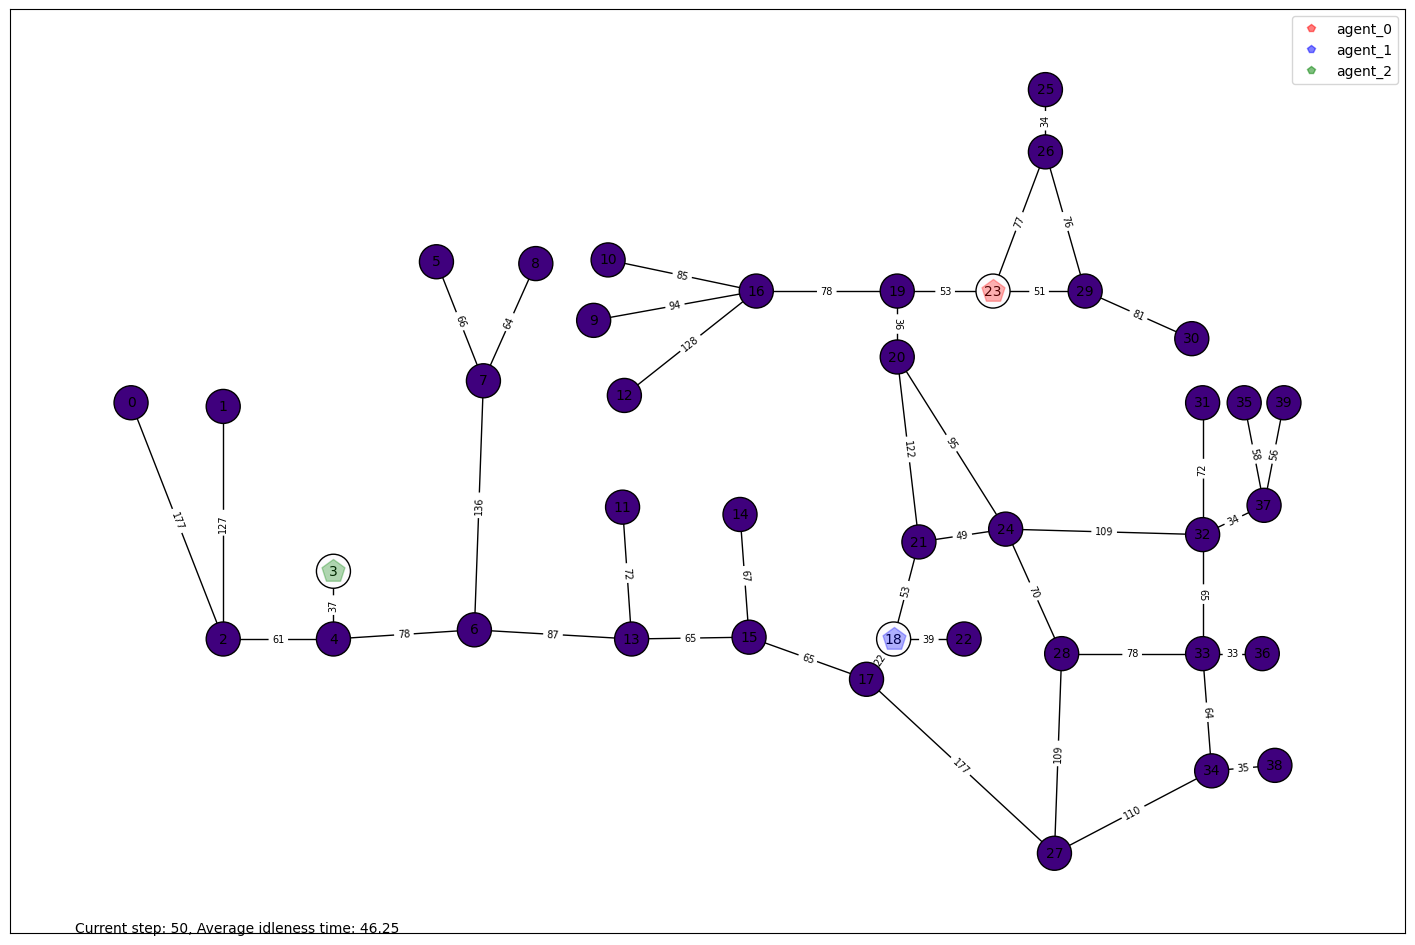

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 3,
                               require_explicit_visit=True)

observations = env.reset(seed=42)

# We temporarily fix the actions to a single node visit for each agent.
actions = {agent: env.action_space(agent).sample() for agent in env.agents}

i = 0
while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    clear_output(wait=True)
    env.render()

    i += 1
    if i >= 50:
        break
env.close()

In [2]:
env.observe(env.agents[0])

{'agent_state': array([[38.1  , 26.25 ],
        [33.975, 12.   ],
        [10.725, 14.775]]),
 'vertex_state': array([50, 50, 50, 50,  0, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50,  0, 50, 50, 50,  0, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50, 50, 50, 50]),
 'vertex_distances': array([819, 769, 642, 618, 581, 705, 503, 639, 703, 225, 216, 488, 259,
        416, 418, 351, 131, 286, 264,  53,  89, 211, 303,   0, 184, 111,
         77, 363, 254,  51, 132, 365, 293, 332, 396, 385, 365, 327, 431,
        383])}